In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import table
from scipy.optimize import curve_fit
from fonctions_maison import *
from scipy.constants import h, c, m_e, e
e_0 = 8.85e-12 # Epsilon 0


On importe les données

In [27]:
#Doublet de sodium
lamda, counts_doublet = np.loadtxt("Données/doublet_sodium.txt", unpack = True, skiprows = 17)

#Échantillon d'or
lamda, counts_or_brute = np.loadtxt("Données/echantillon_or.txt", unpack = True, skiprows = 17)
lamda, counts_or_calib = np.loadtxt("Données/sans_echantillon_or.txt", unpack = True, skiprows = 17)

# GaSe
lamda, counts_GaSe_brute = np.loadtxt("Données/echantillon_GaSe.txt", unpack = True, skiprows = 17)
lamda, counts_GaSe_calib = np.loadtxt("Données/sans_echantillon_GaSe.txt", unpack = True, skiprows = 17)

# Épaisseur vs échantillon
lamda, counts_un_0 = np.loadtxt("Données/un0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)
lamda, counts_trois_0 = np.loadtxt("Données/trois0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_0 = np.loadtxt("Données/vitre0.txt", unpack = True, skiprows = 17)

#Épaisseur vs angle
lamda, counts_deux_45 = np.loadtxt("Données/angles/deux45_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_48 = np.loadtxt("Données/angles/deux48_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_52 = np.loadtxt("Données/angles/deux52_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_56 = np.loadtxt("Données/angles/deux56_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_58 = np.loadtxt("Données/angles/deux58_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_60 = np.loadtxt("Données/angles/deux60_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_62 = np.loadtxt("Données/angles/deux62_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_64 = np.loadtxt("Données/angles/deux64_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_66 = np.loadtxt("Données/angles/deux66_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_68 = np.loadtxt("Données/angles/deux68_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_70 = np.loadtxt("Données/angles/deux70_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_72 = np.loadtxt("Données/angles/deux72_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_74 = np.loadtxt("Données/angles/deux74_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_76 = np.loadtxt("Données/angles/deux76_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_78 = np.loadtxt("Données/angles/deux78_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_80 = np.loadtxt("Données/angles/deux80_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_82 = np.loadtxt("Données/angles/deux82_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_84 = np.loadtxt("Données/angles/deux84_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_86 = np.loadtxt("Données/angles/deux86_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_88 = np.loadtxt("Données/angles/deux88_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_90 = np.loadtxt("Données/angles/deux90_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_92 = np.loadtxt("Données/angles/deux92_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_94 = np.loadtxt("Données/angles/deux94_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_98 = np.loadtxt("Données/angles/deux98_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_103 = np.loadtxt("Données/angles/deux103_0.txt", unpack = True, skiprows = 17)
lamda, counts_deux_107 = np.loadtxt("Données/angles/deux107_0.txt", unpack = True, skiprows = 17)

lamda, counts_vitre_45 = np.loadtxt("Données/angles/vitre45_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_48 = np.loadtxt("Données/angles/vitre48_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_52 = np.loadtxt("Données/angles/vitre52_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_56 = np.loadtxt("Données/angles/vitre56_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_58 = np.loadtxt("Données/angles/vitre58_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_60 = np.loadtxt("Données/angles/vitre60_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_62 = np.loadtxt("Données/angles/vitre62_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_64 = np.loadtxt("Données/angles/vitre64_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_66 = np.loadtxt("Données/angles/vitre66_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_68 = np.loadtxt("Données/angles/vitre68_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_70 = np.loadtxt("Données/angles/vitre70_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_72 = np.loadtxt("Données/angles/vitre72_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_74 = np.loadtxt("Données/angles/vitre74_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_76 = np.loadtxt("Données/angles/vitre76_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_78 = np.loadtxt("Données/angles/vitre78_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_80 = np.loadtxt("Données/angles/vitre80_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_82 = np.loadtxt("Données/angles/vitre82_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_84 = np.loadtxt("Données/angles/vitre84_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_86 = np.loadtxt("Données/angles/vitre86_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_88 = np.loadtxt("Données/angles/vitre88_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_90 = np.loadtxt("Données/angles/vitre90_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_92 = np.loadtxt("Données/angles/vitre92_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_94 = np.loadtxt("Données/angles/vitre94_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_98 = np.loadtxt("Données/angles/vitre98_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_103 = np.loadtxt("Données/angles/vitre103_0.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_107 = np.loadtxt("Données/angles/vitre107_0.txt", unpack = True, skiprows = 17)

#Bonus
lamda, counts_feuille_verte = np.loadtxt("Données/feuille_vieux_arbre.txt", unpack = True, skiprows = 17)
lamda, counts_feuille_brune = np.loadtxt("Données/feuille_morte_vieux_arbre.txt", unpack = True, skiprows = 17)
lamda, counts_vitre_feuille = np.loadtxt("Données/vitre_feuille_vieux_arbre.txt", unpack = True, skiprows = 17)



On fit le doublet de sodium pour déterminer la résolution du spectrographe

H = 3165.690117546604, A = 55778.20194856248, x0 = 588.4706966006324, sigma = 0.6845731444903931


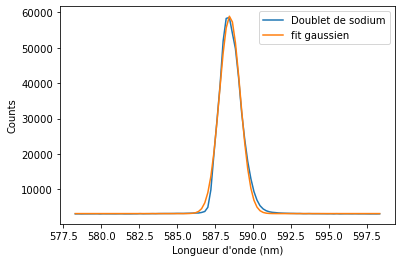

In [3]:
lamda_doublet_gauss, counts_doublet_gauss = lamda_doublet[1100:1200], counts_doublet[1100:1200] #On isole la gaussienne

#Faison un fit gaussien sur la courbe
def gauss(x, H, A, x0, sigma):
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

p0 = [2000, 6e4, 587, 3] #Initial guess
p_opt, p_cov = curve_fit(gauss, lamda_doublet_gauss, counts_doublet_gauss, p0)
print("H = {}, A = {}, x0 = {}, sigma = {}".format(p_opt[0], p_opt[1], p_opt[2], p_opt[3]))

H, A, x0, sigma = p_opt[0], p_opt[1], p_opt[2], p_opt[3]

y_fit = gauss(lamda_doublet_gauss,H, A, x0, sigma)

plt.plot(lamda_doublet_gauss, counts_doublet_gauss, label = "Doublet de sodium")
plt.plot(lamda_doublet_gauss, y_fit, label = "fit gaussien")
plt.xlabel("Longueur d'onde (nm)")
plt.ylabel("Counts")
plt.legend()
plt.savefig("Graphiques/fit_gaussien.pdf")
plt.show()

Détermination de la résolution pour l'incertitude

In [4]:
fwhm = 2.35*sigma #Largeur à mi-hauteur de la gaussienne

res = x0/fwhm
print("Résolution du spectromètre: {}".format(res)) #Résolution du spectromètre

def erreur_lambda(lamda): 
    
    inc = lamda/res

    return inc



Résolution du spectromètre: 365.79445804824735


gap d'énergie/phonon

Comparaison entre spectres GaSe brute et spectre de calibration


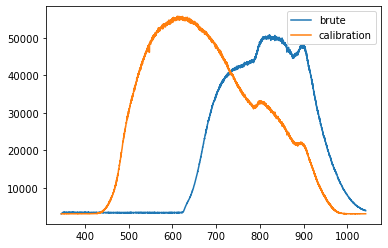

Pourquoi les spectres sont décalés?


In [5]:
with open("Données/echantillon_GaSe.txt") as GaSe_brute:
    int_time_brute = float(list(GaSe_brute)[8].split(":")[1].split("(")[0])
    
with open("Données/sans_echantillon_GaSe.txt") as GaSe_calib:
    int_time_calib = float(list(GaSe_calib)[8].split(":")[1].split("(")[0])
    
# Normalisons le spectre du GaSe   
counts_GaSe_norm = (counts_GaSe_brute/int_time_brute)/(counts_GaSe_calib/int_time_calib)

print("Comparaison entre spectres GaSe brute et spectre de calibration")
plt.plot(lamda, counts_GaSe_brute, label = "brute")
plt.plot(lamda, counts_GaSe_calib, label = "calibration")
plt.legend()
plt.show()

print("Pourquoi les spectres sont décalés?")

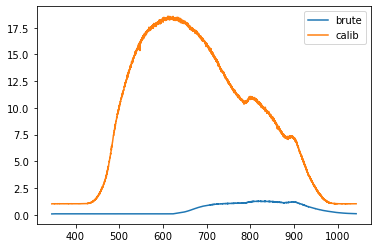

Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.


In [6]:
plt.plot(lamda,counts_GaSe_brute/int_time_brute, label = "brute")
plt.plot(lamda,counts_GaSe_calib/int_time_calib, label = "calib")
plt.legend()
plt.show()

print("Ils ne sont pas décalés, mais tu avais plutôt oublié de divisé par le temps d'intégration.")

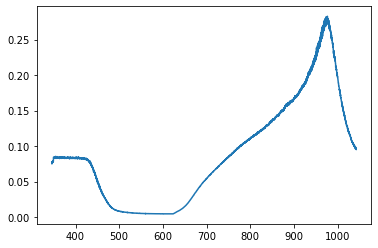

Voici le spectre d'absorption


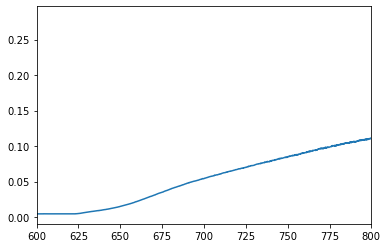

Voici la zone d'importance pour trouver l'énergie de gap et de phonon


In [7]:
plt.plot(lamda,counts_GaSe_norm, label = "normalisé")
plt.show()

print("Voici le spectre d'absorption")

plt.plot(lamda,counts_GaSe_norm, label = "normalisé")
plt.xlim([600,800])
plt.show()

print("Voici la zone d'importance pour trouver l'énergie de gap et de phonon")

Fréquence de plasma de l'or

Comparaison entre spectres d'or brute et spectre de calibration


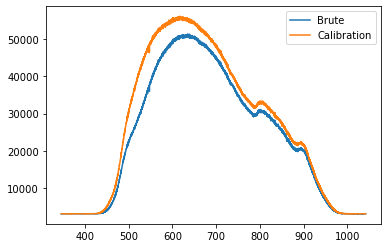

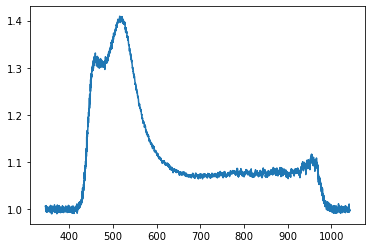

Est-ce que le pic dans le graphique correspond à la fréquence de plasma? 


In [8]:
print("Comparaison entre spectres d'or brute et spectre de calibration")

plt.plot(lamda, counts_or_brute, label = "Brute")
plt.plot(lamda, counts_or_calib, label = "Calibration")
plt.legend()
plt.show()

plt.plot(lamda, counts_or_calib/counts_or_brute)
plt.show()

print("Est-ce que le pic dans le graphique correspond à la fréquence de plasma? ")

Fit gaussien du pic d'absorption de l'or

H = 1.1172590734226504 +/- 0.0006896687571787389, A = 0.2849235513865504 +/- 0.0006585937208846369, x0 = 516.640416385464 +/- 0.06628291128402933, sigma = 31.085469690333568 +/- 0.11776596958532258


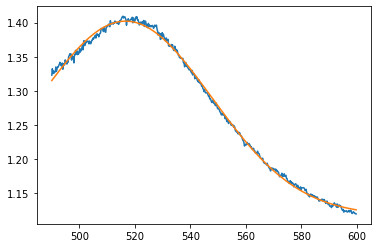

La fréquence plasma de l'or est de 516.640416385464 +- 0.06628291128402933 nm


In [9]:
counts_or_norm = counts_or_calib/counts_or_brute


p0 = [1.2, 1.4, 520, 3] #Initial guess
idebut, ifin = find_nearest(lamda,490), find_nearest(lamda,600)
gauss_or, p_opt, p_err = fit_gaussien(lamda[idebut:ifin], counts_or_norm[idebut:ifin], p0 = p0)

print("La fréquence plasma de l'or est de {} +- {} nm".format(p_opt[2], p_err[2]))

Déterminons la densité électronique de l'or 
$\omega_{pe} = \sqrt{\frac{n_e e^2}{m_e \epsilon_0}}$ 

On a $f = \frac{c}{\lambda}$ et $\omega = 2 \pi f$

Donc, $\omega_{pe} = \frac{2 \pi c }{\lambda}$

Isolons $n_e$:
$$\begin{align}
&\frac{2 \pi c }{\lambda} = \sqrt{\frac{n_e e^2}{m_e \epsilon_0}} \\
&(\frac{2 \pi c }{\lambda})^2 = \frac{n_e e^2}{m_e \epsilon_0} \\
&n_e = (\frac{2 \pi c }{\lambda})^2 \frac{m_e \epsilon_0}{e^2}  
\end{align}$$


In [21]:
onde_plasma = p_opt[2]*10e-9 #en m
print(e)
n_e  = ((2*np.pi*c/onde_plasma)**2)*(m_e*e_0/e**2)
print("La densité électronique de l'échantillon d'or est de:", n_e)

1.602176634e-19
La densité électronique de l'échantillon d'or est de: 4.174801838398995e+25


Régression linéaire sur le spectre du GaSe 

a = 0.0005961512486678806 +/- 1.4533115941226417e-06 et b = -0.36311814977978524 +/- 0.001073827394103372


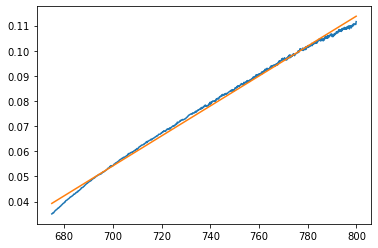

a = 0.0007972468469382458 +/- 4.318188757492538e-06 et b = -0.5037966664243916 +/- 0.002849671918022728


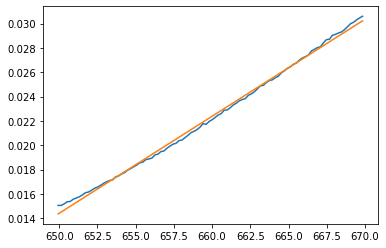

a = -9.652412396997363e-07 +/- 6.864796838643624e-07 et b = 0.0052099605933846075 +/- 0.0004187232988229554


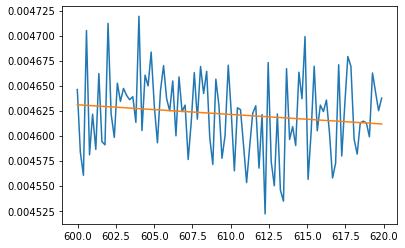

In [10]:
i_gap_debut, i_gap_fin = find_nearest(lamda, 675), find_nearest(lamda, 800) 
i_phonon_debut, i_phonon_fin = find_nearest(lamda, 650), find_nearest(lamda, 670) 
i_plateau_debut, i_plateau_fin = find_nearest(lamda, 600), find_nearest(lamda, 620)
x_gap, y_gap = lamda[i_gap_debut:i_gap_fin], counts_GaSe_norm[i_gap_debut:i_gap_fin]
x_phonon, y_phonon = lamda[i_phonon_debut:i_phonon_fin], counts_GaSe_norm[i_phonon_debut:i_phonon_fin]
x_plateau, y_plateau = lamda[i_plateau_debut:i_plateau_fin], counts_GaSe_norm[i_plateau_debut:i_plateau_fin]

y_fit_gap, popt_gap, perr_gap = reg_lin(x_gap,y_gap)
y_fit_phonon, popt_phonon, perr_phonon = reg_lin(x_phonon,y_phonon)
y_fit_plateau, popt_plateau, perr_plateau = reg_lin(x_plateau, y_plateau)


In [11]:
#Point d'interception entre gap & plateau
lamda_gap = (popt_plateau[1]-popt_gap[1])/(popt_gap[0]-popt_plateau[0])
lamda_phonon = (popt_plateau[1]-popt_phonon[1])/(popt_phonon[0]-popt_plateau[0])

#lamda_gap = -popt_gap[0]/popt_gap[1] #Abscisses à l'origine
#lamda_phonon = -popt_phonon[0]/popt_phonon[1]

E_gap = h*c/(lamda_gap*1e-9)
E_phonon = ( h*c/(lamda_phonon*1e-9) - E_gap )

print("L'énergie de gap est {} eV et l'énergie des phonons est {} eV".format(E_gap/1.602e-19, E_phonon/1.602e-19))

L'énergie de gap est 2.0101960738369926 eV et l'énergie des phonons est -0.06569098333978164 eV


Couche TiO2/Verre

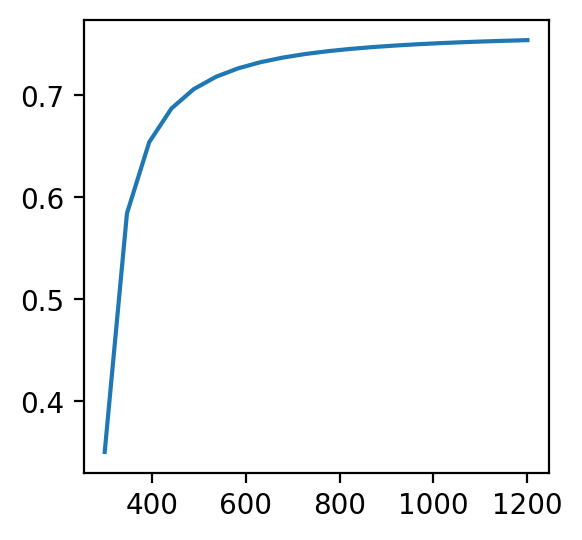

In [35]:
"""#Il faut estimer l'incertitude de l'intensité de la lumière capté par le spectromètre.
i_incert_debut, i_incert_fin = find_nearest(lamda_un_0, 350), find_nearest(lamda_un_0, 370)
x_incert, y_incert = lamda_un_0[i_incert_debut:i_incert_fin], counts_un_0[i_incert_debut:i_incert_fin]
y_fit_incert, popt_incert, perr_incert = reg_lin(x_incert, y_incert)

ysig = np.sum( (counts_un_0[i_incert_debut:i_incert_fin]-y_fit_incert)**2 )/(len(y_fit_incert)-1)  #Estimation de l'incertitude
#print(ysig)
"""
#Début de la fonction à optimiser
theta_0_deg = 15 #Angle en degré
theta_0 = theta_0_deg/180*np.pi #Angle en radian

#lamda = np.linspace(300,1000,100) #remplacer par un linspace!!!!!!!!
lamda_array = np.linspace(300,1200,20)
#print(lamda_array)

T_array = []

for lamda in lamda_array:
    n1 = 1 #n i
    n2 = 2 #n i+1
    n_air = 1 + 0.05792105/(238.0185-(lamda*1e-3)**(-2)) + 0.00167917/(57.362-(lamda*1e-3)**(-2)) #lamda en micromètre
    n_B270 = np.sqrt(1.676*lamda**2/(lamda**2-99.19**2) + 0.3728*lamda**2/(lamda**2-6.359**2) + 0.2172*lamda**2/(lamda**2-6.436**2)) #lamda en nm
    n_TiO2 = np.sqrt(5.913 + 0.2441/((lamda*1e-3)**2-0.0803)) #lamda en micromètre

    #snell-descartes
    theta_1 = np.arcsin(n_air*np.sin(theta_0)/n_TiO2)
    theta_2 = np.arcsin(n_TiO2*np.sin(theta_1)/n_B270)

    d = 100 #Épaisseur de la couche mince; !!!paramètre temporaire!!!
    delta = 4*np.pi*d*n_TiO2*np.cos(theta_1)/(lamda) #vérifier les unités!!!!!!!!

    #On peut prendre les équations 'p' ou 's' sans perte de généralité. Donc voici les équations 'p'.
    #Pour le milieu 0, n1=n_air, n2=n_TiO2.
    n1=n_air
    n2=n_TiO2
    theta1 = theta_0 #Angle Entrant
    theta2 = theta_1 #Angle Sortant
    r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
    t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

    I_0 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)

    #Pour le milieu 1, n1=n_TiO2, n2=n_B270
    n1=n_TiO2
    n2=n_B270
    theta1 = theta_1 #Entrant
    theta2 = theta_2 #Sortant
    r = (n2*np.cos(theta1)-n1*np.cos(theta2))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2,3)
    t = (2*n1*np.cos(theta1))/(n2*np.cos(theta1)+n1*np.cos(theta2)) #(2.3)

    T_1 = np.array([[np.exp(-1.j*delta), 0], [0, np.exp(1.j*delta)]]) #(2.7)
    I_1 = (np.cos(theta2)/np.cos(theta1)) * np.array([[1/t, r/t], [r/t, 1/t]]) #(2.5)
    
    E_1 = np.array([1,0])

    #print(np.shape(T_1))
    #print("I_0= \n", I_0)
    #print("I_1= \n", I_1)

    M = I_0*T_1*I_1
    E_0 = M*E_1 #(2.8)
    
        
    t = 1/E_0[0,0] #(2.9)
    T = n_B270*np.cos(theta_2)*(t*np.conj(t))/(n_air*np.cos(theta_0)) #(2.10)
    T=np.real(T)
    T_array.append(T)

    
plt.figure(1,figsize=(3,3),dpi=200)
plt.plot(lamda_array,T_array)


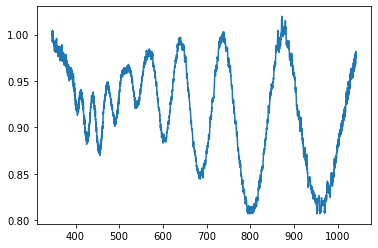

In [13]:
plt.plot(lamda,counts_trois_0/counts_vitre_0)

- Tracer des graphiques théoriques de l'intensité en fonction de la longueur d'onde et comparer visuellement avec les spectres experimentaux pour trouver le d approprié (se fier à la periodicité et à la phase, non à l'amplitude). 

- Fitter seulement le deuxième pic de l'or 

- Loi de snell-descartes pour l'analyse de l'angle d'incidence 

- Angle de référence "0°" : 76° +- 0.5°

Bonus

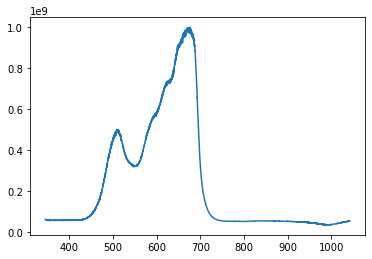

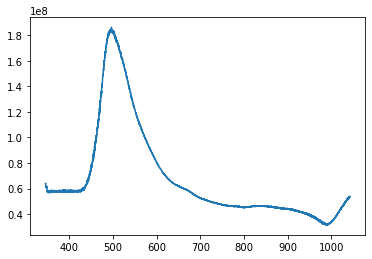

Chlorophylle
H = 1.3278804756155513 +/- 0.022407857966608352, A = 14.926193522474767 +/- 0.08030399292949464, x0 = 656.0351227027677 +/- 0.22022323899713833, sigma = 36.16090542753009 +/- 0.2331783590258263


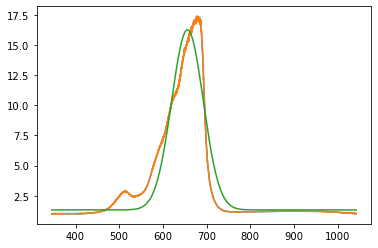

Carotène
H = 47492322.498695135 +/- 189428.93535644127, A = 123320548.76983824 +/- 609181.1803408889, x0 = 512.8952007199939 +/- 0.24930951482463445, sigma = 44.81170005713663 +/- 0.26749929257055066


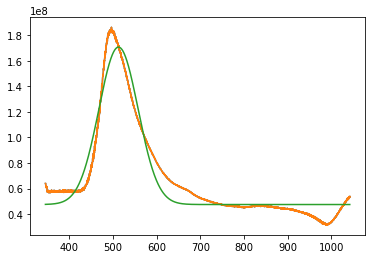

In [34]:
# Calibration pour feuille
with open("Données/vitre_feuille.txt") as vitre_feuille:
    int_time_vitre_feuille = float(list(vitre_feuille)[8].split(":")[1].split("(")[0]) #Temps d'intégration

counts_vitre_feuille /= int_time_vitre_feuille

# Feuille vivante
with open("Données/feuille_vieux_arbre.txt") as feuille_verte:
    int_time_feuille_verte = float(list(feuille_verte)[8].split(":")[1].split("(")[0]) #Temps d'intégration

counts_feuille_verte /= int_time_feuille_verte

counts_feuille_verte_norm = (counts_feuille_verte/counts_vitre_feuille)**(-1)
plt.plot(lamda, counts_feuille_verte_norm)
plt.show()

#Feuille morte
with open("Données/feuille_morte_vieux_arbre.txt") as feuille_brune:
    int_time_feuille_brune = float(list(feuille_brune)[8].split(":")[1].split("(")[0]) #Temps d'intégration
    
counts_feuille_brune /= int_time_feuille_brune

counts_feuille_brune_norm = (counts_feuille_brune/counts_vitre_feuille)**(-1)
plt.plot(lamda, counts_feuille_brune_norm)
plt.show()

#Feuille verte/feuille brune (pic chlorophylle)
counts_chlorophylle = counts_feuille_verte_norm / counts_feuille_brune_norm
print("Chlorophylle")
plt.plot(lamda, counts_chlorophylle)
gauss_verte, p_opt_verte, p_err_verte = fit_gaussien(lamda,counts_chlorophylle, p0 = [0,17,650,3])

#Pic carotène
print("Carotène")
plt.plot(lamda, counts_feuille_brune_norm)
gauss_brune, p_opt_brune, p_err_brune = fit_gaussien(lamda, counts_feuille_brune_norm, p0 = p0 = [0,17,650,3])